In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset 


basketball=pd.read_csv("Basketball.csv")
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


Describe the data

In [4]:
# Size of the dataset

basketball.shape

(61, 13)

In [26]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [5]:
#checking for null values
print(basketball.isnull().any())

Team                   False
Tournament             False
Score                  False
PlayedGames            False
WonGames               False
DrawnGames             False
LostGames              False
BasketScored           False
BasketGiven            False
TournamentChampion     False
Runner-up              False
TeamLaunch             False
HighestPositionHeld    False
dtype: bool


In [27]:
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


 Data Cleaning

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WonGames'>

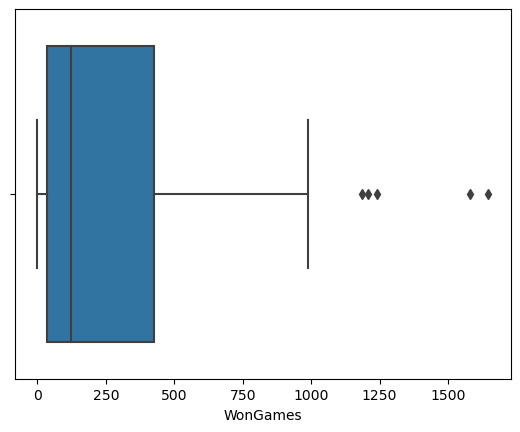

In [14]:
sns.boxplot(basketball['WonGames'])

In [42]:
#we have to find the best performing teams so now we will be focusing on individual rows instead of finding patterns in the 
#whole dataset
#details of the top 20 winning teams, also the teams with highest score
basketball_wongames= basketball.nlargest(20, ['WonGames'])

In [ ]:
TOP 20 TEAMS WITH HIGHEST SCORE AND MOST NUMBER OF MATCHES WON

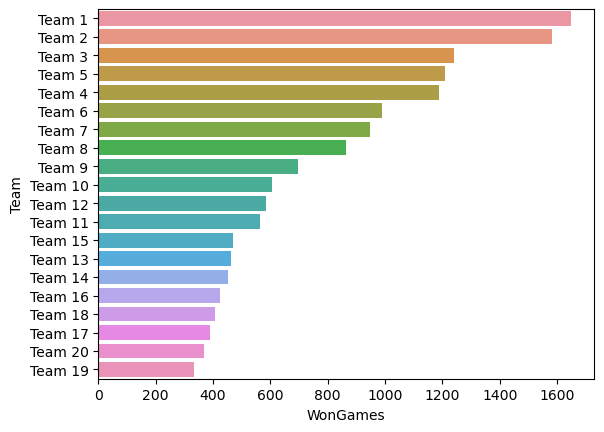

In [43]:
sns.barplot(y=basketball_wongames['Team'], x= basketball_wongames['WonGames'])
plt.show()

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\anaconda3\l

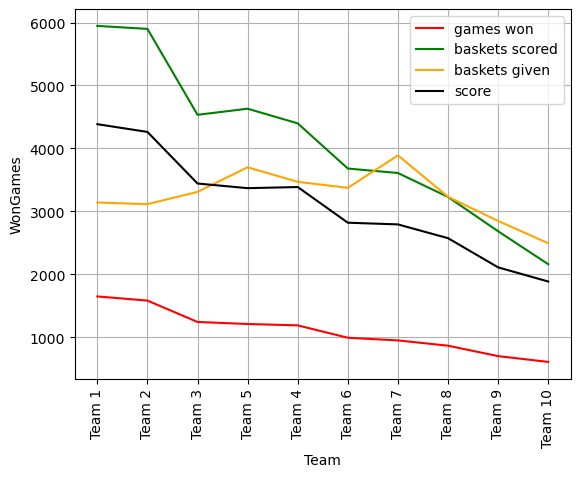

In [19]:
#we will find if the teams with max number of matches won also has the max number of baskets scored
sns.lineplot('Team', 'WonGames', data=basketball_wongames.head(10), color='red')
sns.lineplot('Team', 'BasketScored', data=basketball_wongames.head(10), color='green')
sns.lineplot('Team', 'BasketGiven', data=basketball_wongames.head(10), color='orange')
sns.lineplot('Team', 'Score', data=basketball_wongames.head(10), color='black')
plt.grid()
plt.xticks(rotation=90)
plt.legend(labels=['games won', 'baskets scored', 'baskets given', 'score'])
plt.show()

In [ ]:
TEAM 1 has the highest score, max games won and baskets scored. Baskets given increases as number of matches won decreases

<AxesSubplot:>

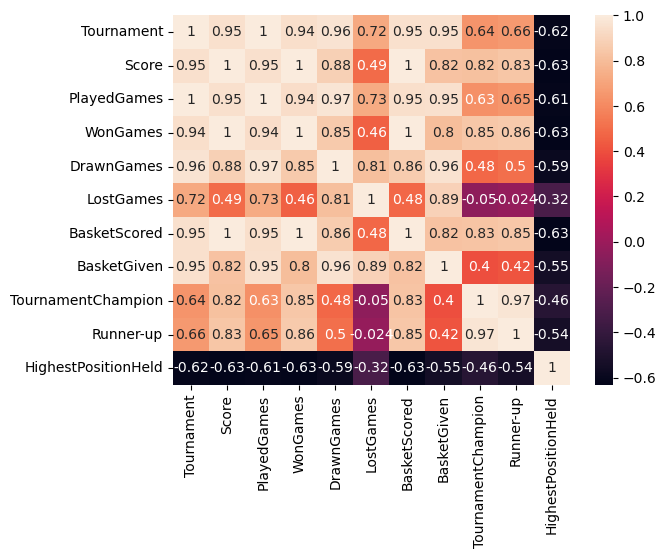

In [20]:
sns.heatmap(basketball_wongames.corr(), annot=True)

In [ ]:
there is a very strong correlation between games won,baskets scored 

In [21]:
# Teams who have been tournament champions for the max number of times
basketball.nlargest(10, 'TournamentChampion')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86.0,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1
1,Team 2,86.0,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1
2,Team 3,80.0,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1
4,Team 5,86.0,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1
3,Team 4,82.0,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1
7,Team 8,70.0,2573.0,2302.0,864.0,577.0,861.0,3228.0,3230.0,2.0,3.0,1929,1
5,Team 6,73.0,2819.0,2408.0,990.0,531.0,887.0,3680.0,3373.0,1.0,4.0,1934,1
9,Team 10,51.0,1884.0,1728.0,606.0,440.0,682.0,2159.0,2492.0,1.0,0.0,1932,1
10,Team 11,45.0,1814.0,1530.0,563.0,392.0,575.0,2052.0,2188.0,1.0,5.0,1941,1
6,Team 7,82.0,2792.0,2626.0,948.0,608.0,1070.0,3609.0,3889.0,0.0,0.0,1929,3


C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TeamLaunch', ylabel='Team'>

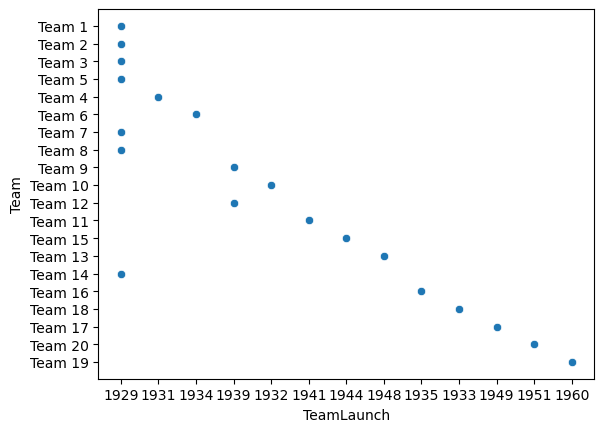

In [22]:
sns.scatterplot( 'TeamLaunch', 'Team', data=basketball_wongames)

In [44]:
# Replacae all '-' with 0
basketball.replace(to_replace='-', value=0, inplace=True)

# Correction for TeamLaunch column
basketball['TeamLaunch'] = basketball['TeamLaunch'].apply(lambda year: str(year)[:4])

In [45]:
# Convert the datatype of all columns to integer except for TeamName
columns = basketball.columns
basketball[columns[1:]] = basketball[columns[1:]].astype('int64')
basketball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 18
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 20 non-null     object
 1   Tournament           20 non-null     int64 
 2   Score                20 non-null     int64 
 3   PlayedGames          20 non-null     int64 
 4   WonGames             20 non-null     int64 
 5   DrawnGames           20 non-null     int64 
 6   LostGames            20 non-null     int64 
 7   BasketScored         20 non-null     int64 
 8   BasketGiven          20 non-null     int64 
 9   TournamentChampion   20 non-null     int64 
 10  Runner-up            20 non-null     int64 
 11  TeamLaunch           20 non-null     int64 
 12  HighestPositionHeld  20 non-null     int64 
 13  prob                 20 non-null     int64 
 14  lost                 20 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 2.5+ KB


In [4]:
# Describe the dataset with various summary and statistics
basketball.describe()

,Tournament,HighestPositionHeld
count,61.000000,61.000000
mean,24.000000,7.081967
std,26.827225,5.276663
min,1.000000,1.000000
25%,4.000000,3.000000
50%,12.000000,6.000000
75%,38.000000,10.000000
max,86.000000,20.000000


In [33]:
# Add WinningPercentage features
# basketbcall.drop('WinningPercentage', axis=1, inplace=True)
won_pct = basketball['WonGames'] / basketball['PlayedGames']
basketball.insert(loc=5, column='WinningPercentage', value=won_pct)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0,4631,3700,8,7,1929,1


In [34]:
# Add LoosingPercentage features
# basketball.drop('LoosingPercentage', axis=1, inplace=True)
won_pct = basketball['LostGames'] / basketball['PlayedGames']
basketball.insert(loc=8, column='LoosingPercentage', value=won_pct)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,0,4631,3700,8,7,1929,1


In [35]:
# Add WinningRatio features
# basketball.drop('WinningRatio', axis=1, inplace=True)
won_pct = basketball['WonGames'] / basketball['LostGames']
basketball.insert(loc=9, column='WinningRatio', value=won_pct)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,WinningRatio,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,8,7,1929,1


In [36]:
# Add BasketRatio features
# basketball.drop('BasketRatio', axis=1, inplace=True)
won_pct = basketball['BasketScored'] / basketball['BasketGiven']
basketball.insert(loc=13, column='BasketRatio', value=won_pct)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,WinningRatio,CancelledGames,BasketScored,BasketGiven,BasketRatio,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,1.893949,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,1.894669,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,1.370202,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,1.267801,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,1.251622,8,7,1929,1


C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, 'Team 1'),
  Text(1, 0, 'Team 2'),
  Text(2, 0, 'Team 3'),
  Text(3, 0, 'Team 4'),
  Text(4, 0, 'Team 5'),
  Text(5, 0, 'Team 6'),
  Text(6, 0, 'Team 7'),
  Text(7, 0, 'Team 8'),
  Text(8, 0, 'Team 9'),
  Text(9, 0, 'Team 10'),
  Text(10, 0, 'Team 11'),
  Text(11, 0, 'Team 12'),
  Text(12, 0, 'Team 13'),
  Text(13, 0, 'Team 14'),
  Text(14, 0, 'Team 15'),
  Text(15, 0, 'Team 16'),
  Text(16, 0, 'Team 17'),
  Text(17, 0, 'Team 18'),
  Text(18, 0, 'Team 19'),
  Text(19, 0, 'Team 20'),
  Text(20, 0, 'Team 21'),
  Text(21, 0, 'Team 22'),
  Text(22, 0, 'Team 23'),
  Text(23, 0, 'Team 24'),
  Text(24, 0, 'Team 25'),
  Text(25, 0, 'Team 26'),
  Text(26, 0, 'Team 27'),
  Text(27, 0, 'Team 28'),
  Text(28, 0,

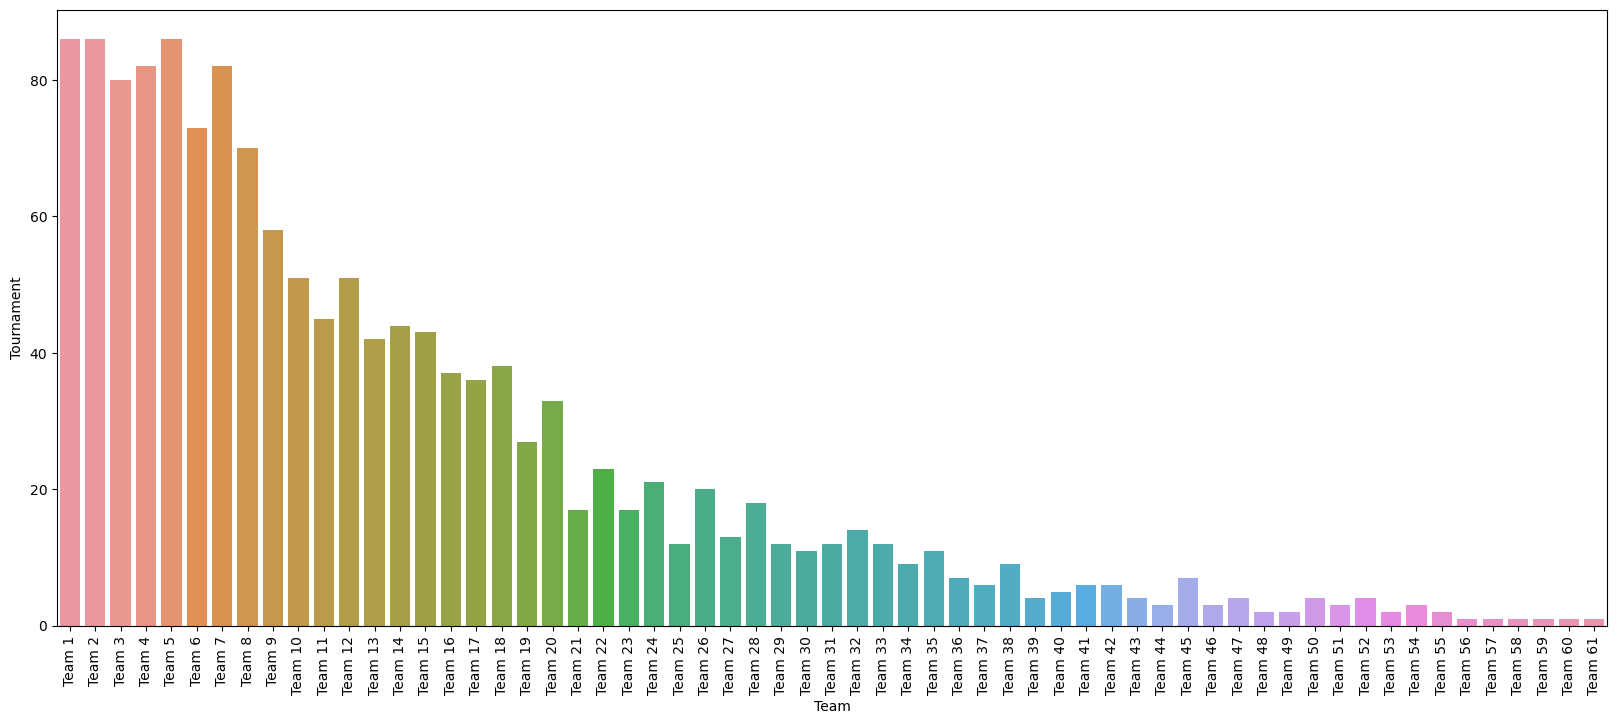

In [38]:
# No of tournaments played by teams
plt.figure(figsize=(20,8))
sns.barplot(basketball['Team'], basketball['Tournament'])
plt.xticks(rotation=90)

Text(0.5, 1.0, '# matches lost')

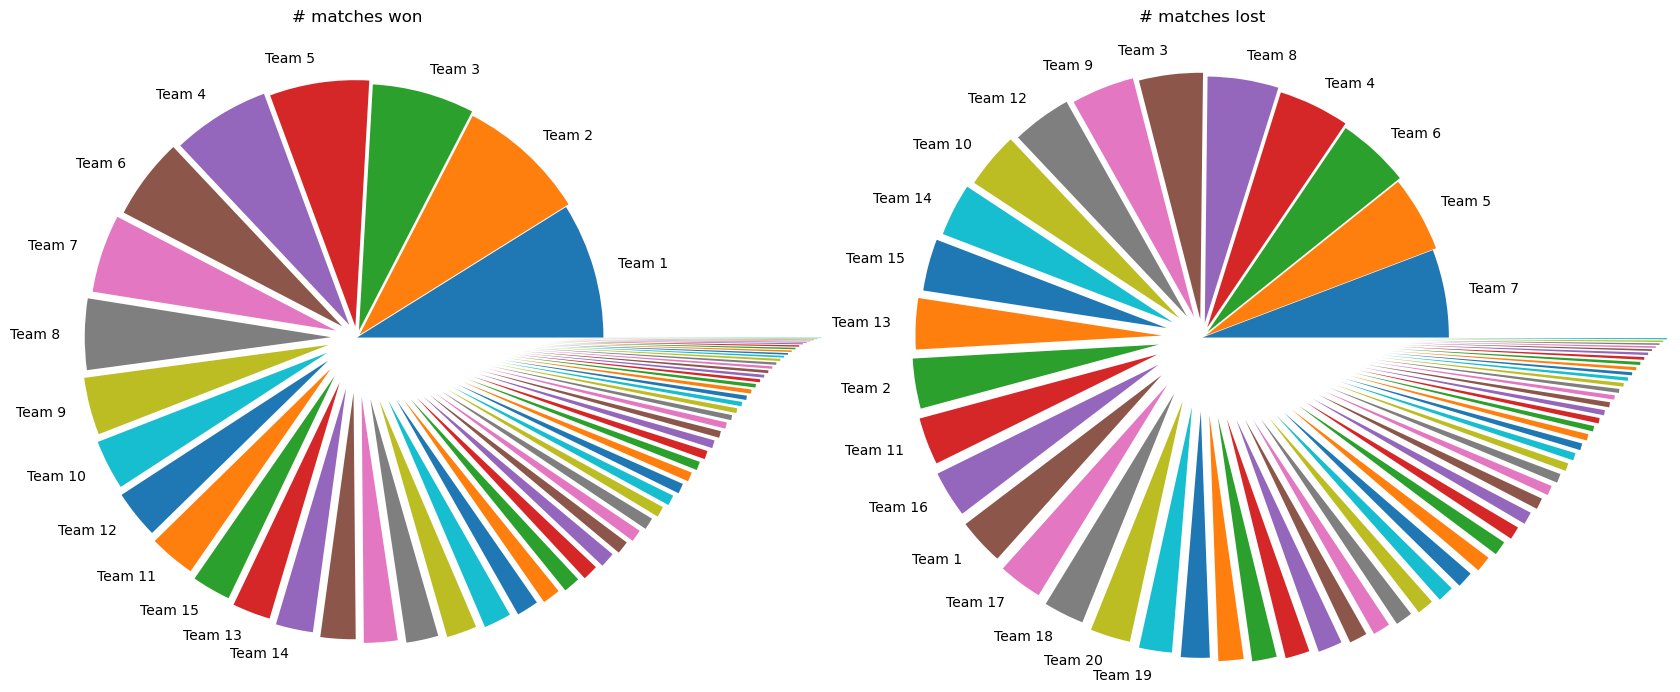

In [39]:
# No of matches won/lost by teams
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
bb = basketball[['Team','WonGames']].sort_values(by="WonGames", ascending=False)
plot = plt.pie(bb['WonGames'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15), explode=[0.015*x for x in range(len(bb))])
plt.title('# matches won')
plt.subplot(1,2,2)
bb = basketball[['Team','LostGames']].sort_values(by="LostGames", ascending=False)
plot = plt.pie(bb['LostGames'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20), explode=[0.015*x for x in range(len(bb))])
plt.title('# matches lost')

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='Team'>

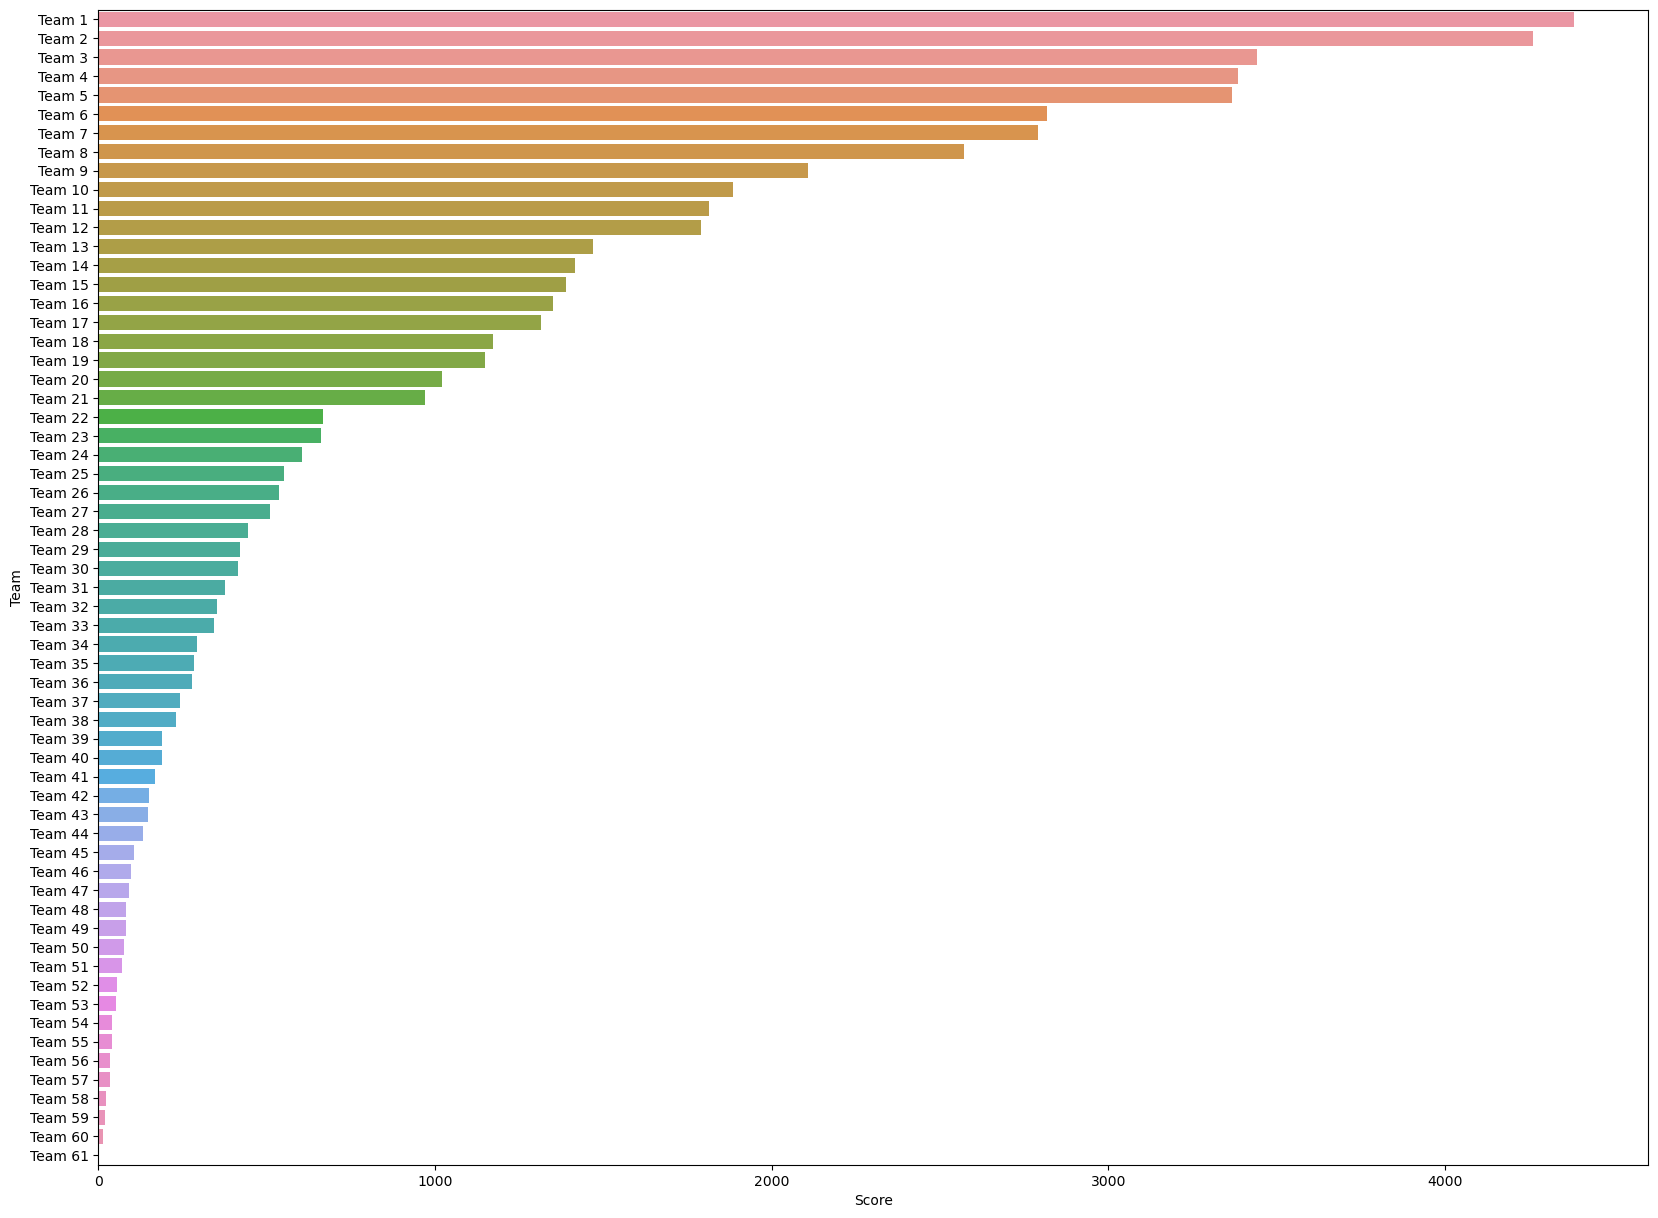

In [40]:
# Scores of the teams
plt.figure(figsize=(20,15))
sns.barplot(basketball['Score'], basketball['Team'], orient='h')

Text(0.5, 1.0, '# Baskets given')

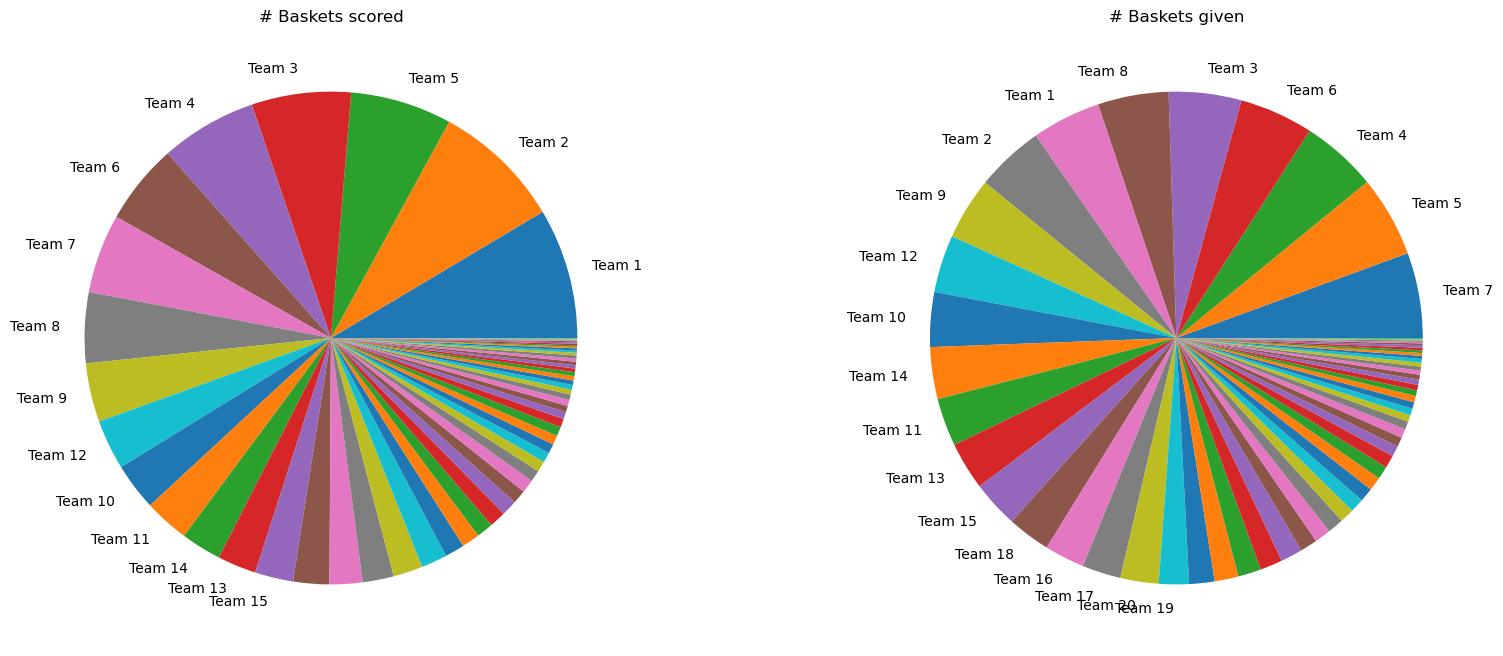

In [41]:
# No of baskets scored/given by teams
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
bb = basketball[['Team','BasketScored']].sort_values(by="BasketScored", ascending=False)
plot = plt.pie(bb['BasketScored'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15))
plt.title('# Baskets scored')
plt.subplot(1,2,2)
bb = basketball[['Team','BasketGiven']].sort_values(by="BasketGiven", ascending=False)
plot = plt.pie(bb['BasketGiven'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20))
plt.title('# Baskets given')

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Team 2'),
  Text(1, 0, 'Team 1'),
  Text(2, 0, 'Team 3'),
  Text(3, 0, 'Team 5'),
  Text(4, 0, 'Team 4'),
  Text(5, 0, 'Team 11'),
  Text(6, 0, 'Team 6'),
  Text(7, 0, 'Team 8'),
  Text(8, 0, 'Team 9'),
  Text(9, 0, 'Team 21'),
  Text(10, 0, 'Team 20'),
  Text(11, 0, 'Team 14'),
  Text(12, 0, 'Team 15')])

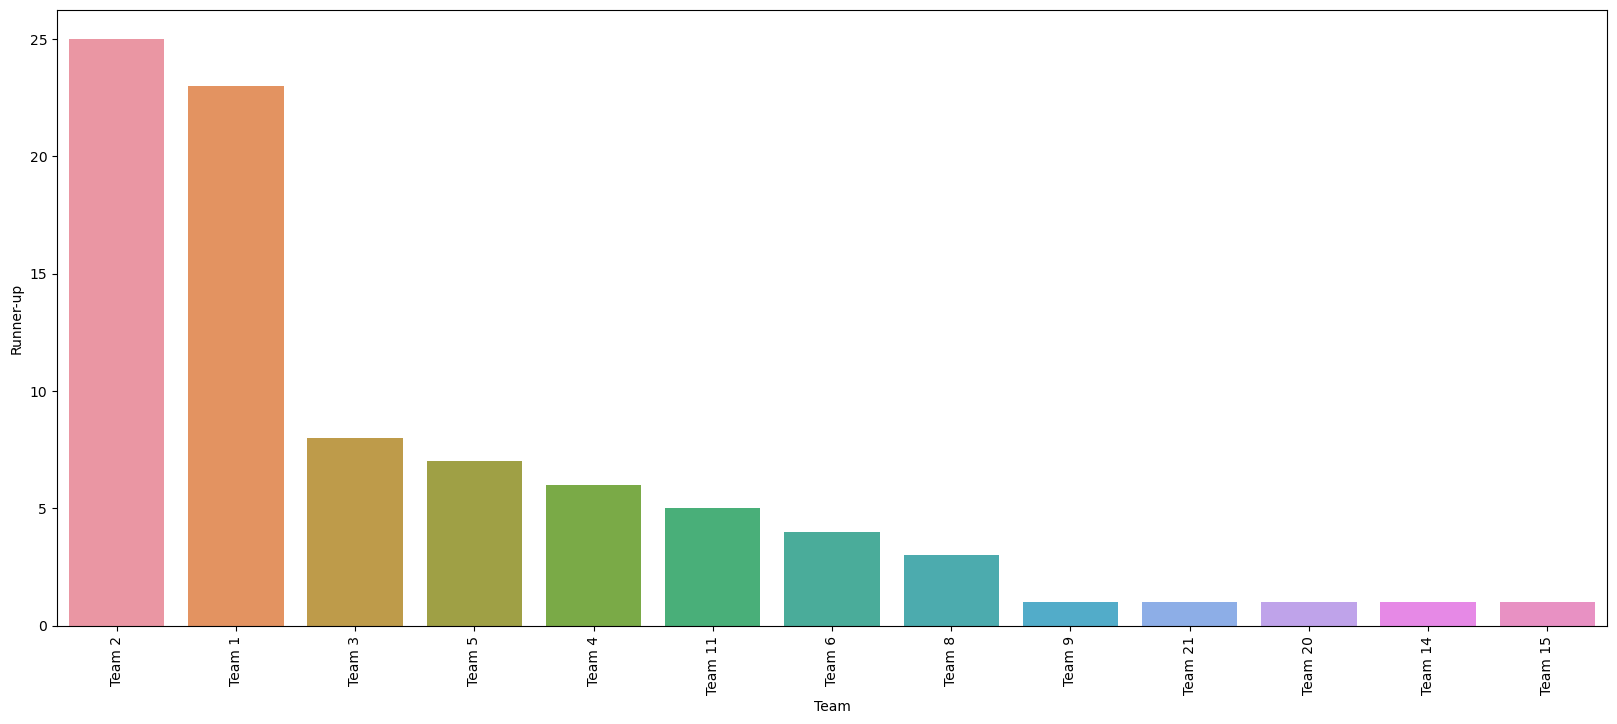

In [42]:
# The most runner-up
plt.figure(figsize=(20,8))
bb = basketball[['Team','Runner-up']].sort_values(by="Runner-up", ascending=False).where(lambda x: x["Runner-up"] > 0)
sns.barplot(bb['Team'], bb['Runner-up'])
plt.xticks(rotation=90)

Suggestions for data points

Quality:
Some of the columns had mixed data like TeamLaunch, special instructions can be mentioned while adding the data like 'only enter the year of team formation' to avoid this.

Quantity:
Since our dataset had only 61 entries, we couldn't figure out more trends. We can include information about the players of each team, at least of the captains. It would have given us some information about the team's performance under different captains.

Velocity:
efficient speed of data collection can be achieved if we maintain a regular record of the games, keep adding data after every match.

Variety:
Again, more information about the team players can help us add variety to the data and will help us understand trends over the years.

Conclusion
Company X can approach the top 5 teams namely Team 1,2,3,4,5 since they have the highest score, max no of baskets scored, max winning % and most